# libraries importing

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# heart dataset data importing

In [2]:
data = pd.read_csv("data/heart-data-discretized.csv")


In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,2,1,0,1,0,0,1,3,0,0,2,2,3,0
1,2,1,0,2,0,1,0,3,1,2,0,0,3,0
2,4,1,0,2,0,0,1,2,1,2,0,0,3,0
3,3,1,0,2,0,0,1,3,0,0,2,1,3,0
4,3,0,0,2,1,1,1,1,0,1,1,3,2,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       1025 non-null   int64
 1   sex       1025 non-null   int64
 2   cp        1025 non-null   int64
 3   trestbps  1025 non-null   int64
 4   chol      1025 non-null   int64
 5   fbs       1025 non-null   int64
 6   restecg   1025 non-null   int64
 7   thalach   1025 non-null   int64
 8   exang     1025 non-null   int64
 9   oldpeak   1025 non-null   int64
 10  slope     1025 non-null   int64
 11  ca        1025 non-null   int64
 12  thal      1025 non-null   int64
 13  target    1025 non-null   int64
dtypes: int64(14)
memory usage: 112.2 KB


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,2.154146,0.695610,0.942439,1.293659,0.879024,0.149268,0.529756,2.479024,0.336585,0.531707,1.385366,0.754146,2.323902,0.513171
std,0.973098,0.460373,1.029641,0.885323,0.686789,0.356527,0.527878,0.915256,0.472772,0.835737,0.617755,1.030798,0.620660,0.500070
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,3.000000,1.000000,2.000000,2.000000,1.000000,0.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000
max,4.000000,1.000000,3.000000,4.000000,4.000000,1.000000,2.000000,4.000000,1.000000,4.000000,2.000000,4.000000,3.000000,1.000000


# null values checking of heart dataset

In [6]:
data.isnull().any().any()

False

# visualization of data

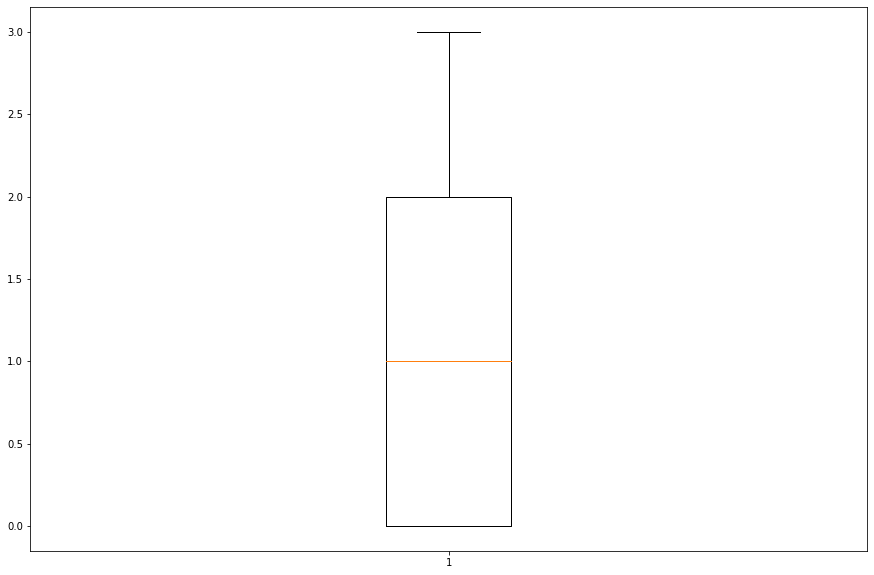

In [7]:
import matplotlib.pyplot as plt
np.random.seed(20)
box = data['cp']
fig = plt.figure(figsize =(15, 10))
plt.boxplot(box)
plt.show()

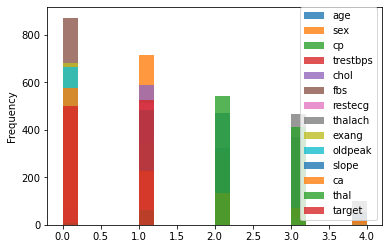

In [8]:
hist_graph=data.plot.hist(bins=20,alpha=0.8)
hist_graph;

<AxesSubplot:>

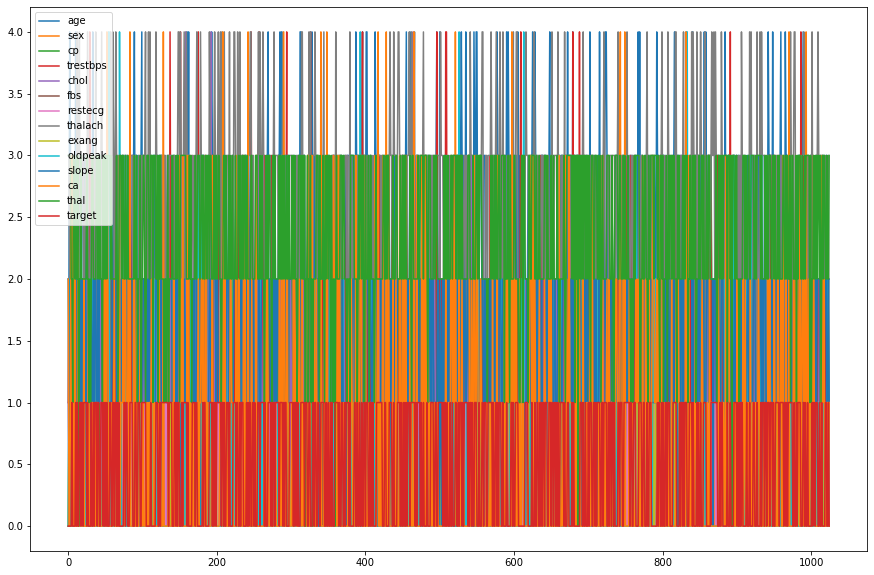

In [9]:
data.plot(figsize=(15,10))

C:\Users\91700\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


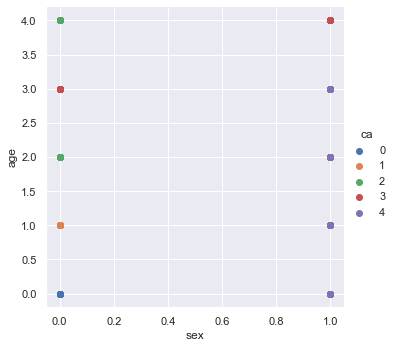

In [10]:
import seaborn as sns
sns.set()
sns.FacetGrid(data,hue="ca",size=5) \
.map(plt.scatter,"sex","age") \
.add_legend()
plt.show() 

<AxesSubplot:>

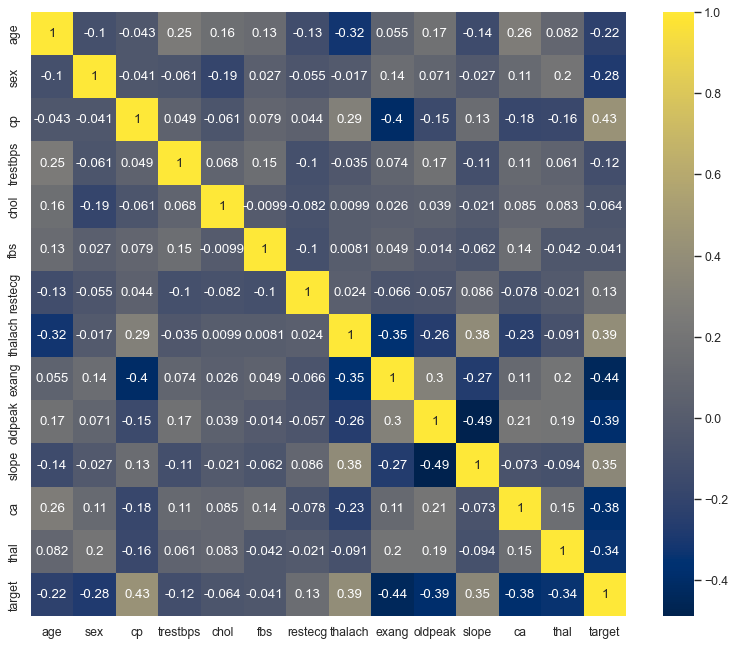

In [11]:
import seaborn as sns
from matplotlib.pyplot import figure
figure(figsize=(12, 10), dpi=80)
sns.heatmap(data.corr(), annot = True, fmt='.2g',cmap= 'cividis')

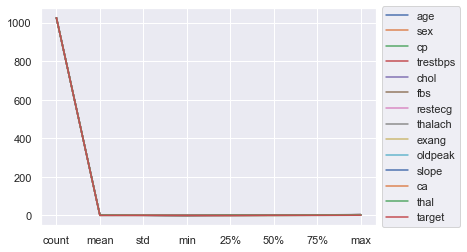

In [12]:
data.describe().plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [13]:
data = data.apply(lambda x: pd.factorize(x)[0])
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,1,1,0,1,1,1,1,0,0
2,1,0,0,1,0,0,0,1,1,1,1,1,0,0
3,2,0,0,1,0,0,0,0,0,0,0,2,0,0
4,2,1,0,1,1,1,0,2,0,2,2,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,2,0,1,1,1,0,0,0,1,0,0,1,1,1
1021,2,0,0,0,1,0,1,1,1,1,2,2,0,0
1022,3,0,0,2,1,0,1,2,1,0,2,2,1,0
1023,0,1,0,2,1,0,1,0,0,0,0,1,1,1


# stroke dataset data2 importing

In [14]:
data2 = pd.read_csv("data/stroke-data-discretized.csv")

In [15]:
data2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,4,0,1,Yes,Private,Urban,4,1,formerly smoked,1
1,Female,3,0,0,Yes,Self-employed,Rural,3,1,never smoked,1
2,Male,4,0,1,Yes,Private,Rural,1,1,never smoked,1
3,Female,2,0,0,Yes,Private,Urban,2,1,smokes,1
4,Female,4,1,0,Yes,Self-employed,Rural,2,0,never smoked,1


In [16]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gender             5110 non-null   object
 1   age                5110 non-null   int64 
 2   hypertension       5110 non-null   int64 
 3   heart_disease      5110 non-null   int64 
 4   ever_married       5110 non-null   object
 5   work_type          5110 non-null   object
 6   Residence_type     5110 non-null   object
 7   avg_glucose_level  5110 non-null   int64 
 8   bmi                5110 non-null   int64 
 9   smoking_status     5110 non-null   object
 10  stroke             5110 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 439.3+ KB


In [17]:
data2.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.00000,5110.000000
mean,2.128963,0.097456,0.054012,0.697847,0.55773,0.048728
std,1.336658,0.296607,0.226063,1.058060,0.56040,0.215320
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,1.00000,0.000000
75%,3.000000,0.000000,0.000000,1.000000,1.00000,0.000000
max,4.000000,1.000000,1.000000,4.000000,4.00000,1.000000


# null values checking of stroke dataset

In [18]:
data2.isnull().any().any()

False

# visualization of data2

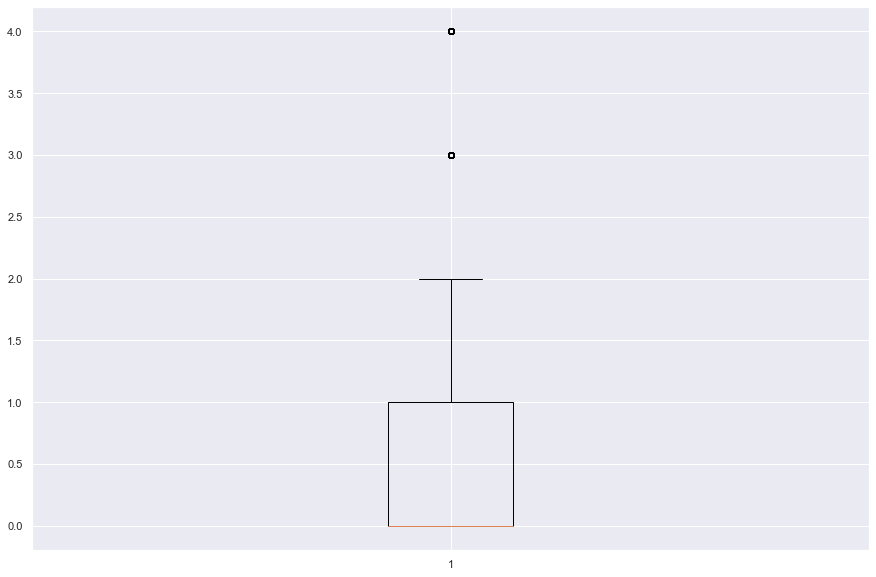

In [19]:
np.random.seed(20)
box2 = data2['avg_glucose_level']
fig = plt.figure(figsize =(15, 10))
plt.boxplot(box2)
plt.show()

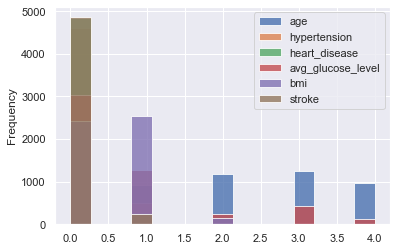

In [20]:
hist2=data2.plot.hist(bins=15,alpha=0.8)
hist2;

<AxesSubplot:>

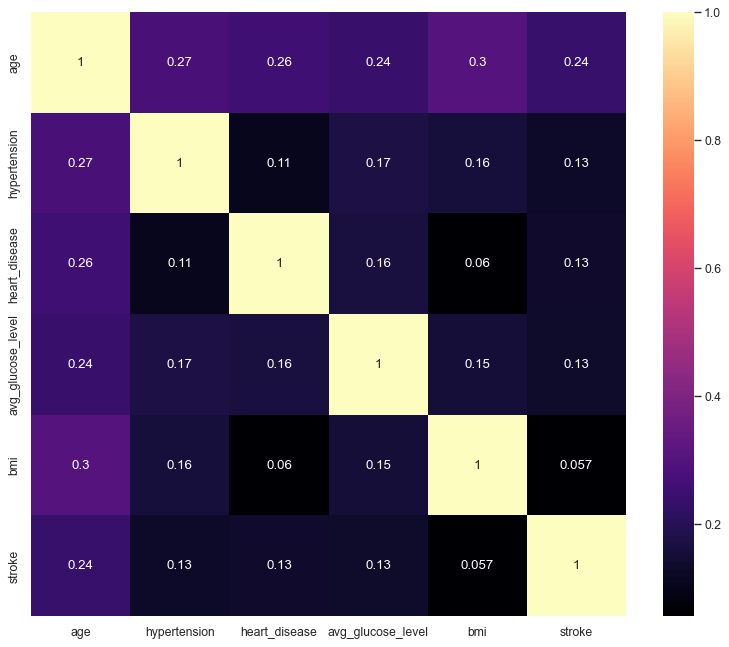

In [21]:
import seaborn as sns
from matplotlib.pyplot import figure
figure(figsize=(12, 10), dpi=80)
sns.heatmap(data2.corr(), annot = True, fmt='.2g',cmap= 'magma')

# converting the columns values from object to int

In [22]:
data2[['age']]=data2[['age']].apply(lambda col:pd.Categorical(col).codes)
data2[['gender']]=data2[['gender']].apply(lambda col:pd.Categorical(col).codes)
data2[['ever_married']]=data2[['ever_married']].apply(lambda col:pd.Categorical(col).codes)
data2[['work_type']]=data2[['work_type']].apply(lambda col:pd.Categorical(col).codes)
data2[['Residence_type']]=data2[['Residence_type']].apply(lambda col:pd.Categorical(col).codes)
data2[['avg_glucose_level']]=data2[['avg_glucose_level']].apply(lambda col:pd.Categorical(col).codes)
data2[['bmi']]=data2[['bmi']].apply(lambda col:pd.Categorical(col).codes)
data2[['smoking_status']]=data2[['smoking_status']].apply(lambda col:pd.Categorical(col).codes)
data2[['stroke']]=data2[['stroke']].apply(lambda col:pd.Categorical(col).codes)

In [23]:
data2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,4,0,1,1,2,1,4,1,1,1
1,0,3,0,0,1,3,0,3,1,2,1
2,1,4,0,1,1,2,0,1,1,2,1
3,0,2,0,0,1,2,1,2,1,3,1
4,0,4,1,0,1,3,0,2,0,2,1


<AxesSubplot:>

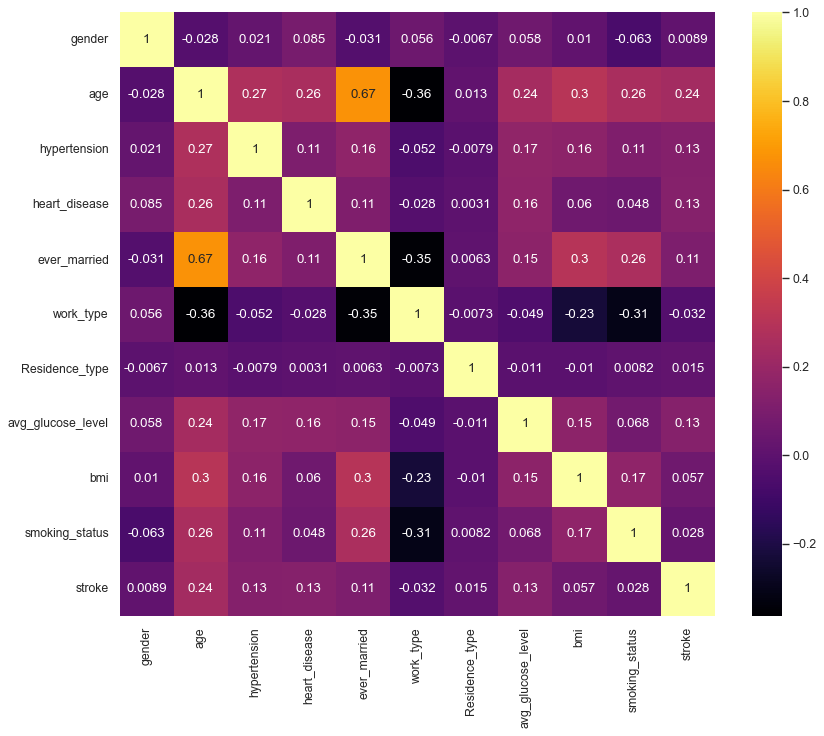

In [24]:
import seaborn as sns
from matplotlib.pyplot import figure
figure(figsize=(12, 10), dpi=80)
sns.heatmap(data2.corr(), annot = True, fmt='.2g',cmap= 'inferno')

In [25]:
data2 = data2.apply(lambda x: pd.factorize(x)[0])
data2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,1,1,1,0,1,0
2,0,0,0,0,0,0,1,2,0,1,0
3,1,2,0,1,0,0,0,3,0,2,0
4,1,0,1,1,0,1,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,1,1,0,0,0,4,0,1,1
5106,1,0,0,1,0,1,0,2,0,1,1
5107,1,2,0,1,0,1,1,4,0,1,1
5108,0,1,0,1,0,0,1,3,1,0,1


# classifying the x and y values

In [26]:
# data classfication
x=data.drop('target',axis=1)
y=data[['target']]
# data2 classfication
x2=data2.drop('stroke',axis=1)
y2=data2[['stroke']]

# test and train dividing

In [27]:
# data splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
# data2 splitting
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.33, random_state=42)

# 1.a. Bayesian Networks

In [28]:
from sklearn.naive_bayes import BernoulliNB
Bernoull = BernoulliNB()
Bernoull.fit(x_train,y_train)

C:\Users\91700\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB()

In [29]:
# accuracy score
predict_Bernoull = Bernoull.predict(x_test)
accuracy_score(y_test,predict_Bernoull)

0.7905604719764012

# decision tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier(random_state=0)

In [31]:
DecisionTree.fit(x2_train, y2_train)

DecisionTreeClassifier(random_state=0)

In [32]:
DecisionTree_pred = DecisionTree.predict(x2_test)

In [33]:
# accuracy score
accuracy_score(y2_test, DecisionTree_pred)

0.9134558387670421

In [34]:
confusion_matrix(y2_test, DecisionTree_pred)

array([[   9,   87],
       [  59, 1532]], dtype=int64)

In [35]:
print(classification_report(y2_test, DecisionTree_pred))

              precision    recall  f1-score   support

           0       0.13      0.09      0.11        96
           1       0.95      0.96      0.95      1591

    accuracy                           0.91      1687
   macro avg       0.54      0.53      0.53      1687
weighted avg       0.90      0.91      0.91      1687



# 1.b

# rejection sampling

In [36]:
from math import sqrt
np.random.randn(2000)

array([ 0.88389311,  0.19586502,  0.35753652, ..., -0.20870062,
       -0.08635826, -1.05431243])

In [37]:
f=lambda x: np.exp(-(x**2)/2)/(sqrt(2*3.14))

In [38]:
M=0.4 #scale factor
M

0.4

In [39]:
u1=np.random.rand(10000)*3  
u2=np.random.rand(10000)   
idx,=np.where(u2<=f(u1)/M)

In [40]:
output=u1[idx]
output

array([1.13505401, 1.54268088, 0.85386145, ..., 0.66872671, 0.46971959,
       0.34440238])

# 1.c

# Gaussian

In [41]:
from sklearn.naive_bayes import GaussianNB
Gaussian = GaussianNB()
Gaussian.fit(x2_train, y2_train)

C:\Users\91700\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [42]:
Gaussian_pred = Gaussian.predict(x2_test)

In [43]:
# accuracy score
accuracy_score(y2_test, Gaussian_pred)

0.8689982216953172

In [44]:
print(classification_report(y2_test, Gaussian_pred))

              precision    recall  f1-score   support

           0       0.20      0.42      0.27        96
           1       0.96      0.90      0.93      1591

    accuracy                           0.87      1687
   macro avg       0.58      0.66      0.60      1687
weighted avg       0.92      0.87      0.89      1687



In [45]:
confusion_matrix(y2_test, Gaussian_pred)

array([[  40,   56],
       [ 165, 1426]], dtype=int64)